In [41]:
import math
import cv2
import numpy as np
import Preprocess
import matplotlib.pyplot as plt
# import các thư viện cần dùng

In [42]:
# Đọc và thay đổi kích thước hình ảnh
img = cv2.imread("D:/Monhoc/AI/BTL/AI-232IS54A01-Group9/Lamlai/data/image/bsx1.png")
img = cv2.resize(img, dsize=(1920, 1080))

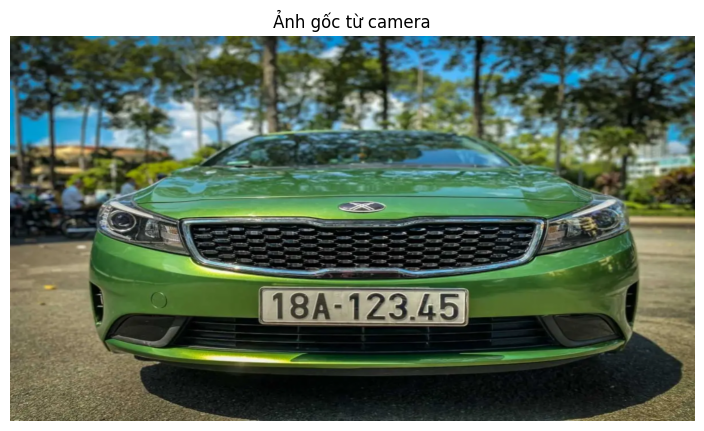

In [43]:

# Hiển thị ảnh gốc
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc từ camera")
plt.axis('off')
plt.show()

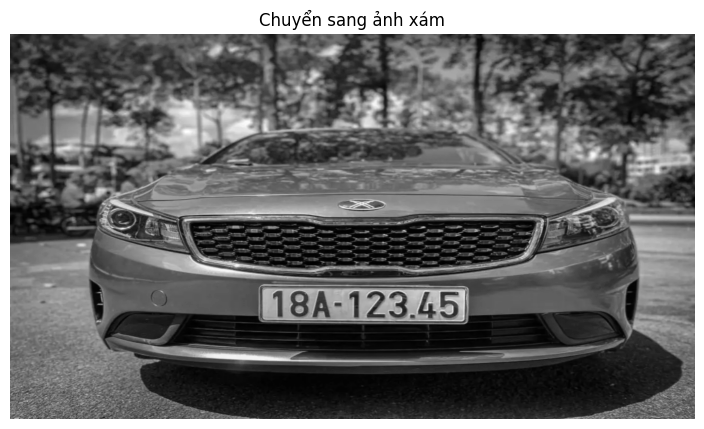

In [44]:
# Chuyển sang ảnh xám
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 5))
plt.imshow(imgGray, cmap='gray')
plt.title("Chuyển sang ảnh xám")
plt.axis('off')
plt.show()

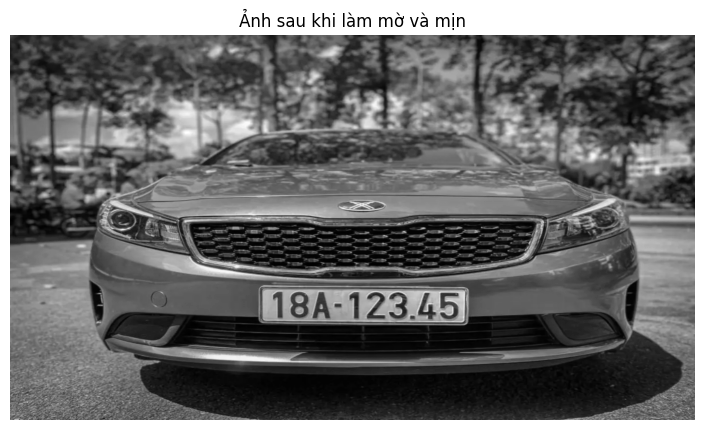

In [45]:
# giảm nhiễu và làm mịn ảnh bằng Gassian Blur
blurred_image = cv2.GaussianBlur(imgGray, (7, 7), 0.1)
plt.figure(figsize=(10, 5))
plt.imshow(blurred_image, cmap='gray')
plt.title("Ảnh sau khi làm mờ và mịn")
plt.axis('off')
plt.show()

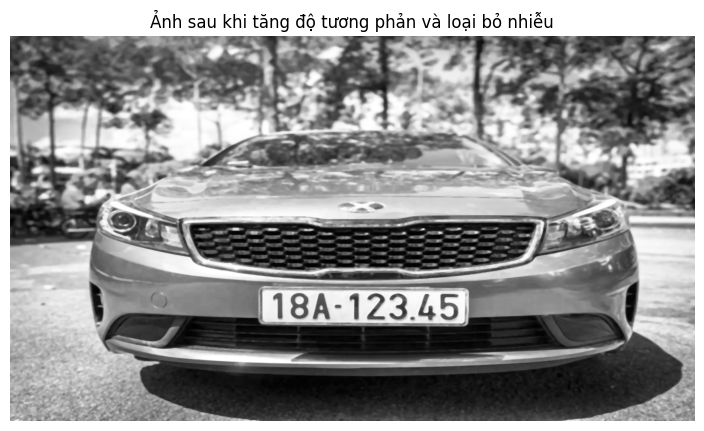

In [46]:
# cân bằng Histogram - tăng cường độ tương phản bằng equalize
equalized = cv2.equalizeHist(blurred_image)
# lọc trung vị để loại bỏ nhiễu sử dụng MedianBlur
denoised = cv2.medianBlur(equalized, 7)
plt.figure(figsize=(10, 5))
plt.imshow(denoised, cmap='gray')
plt.title("Ảnh sau khi tăng độ tương phản và loại bỏ nhiễu")
plt.axis('off')
plt.show()

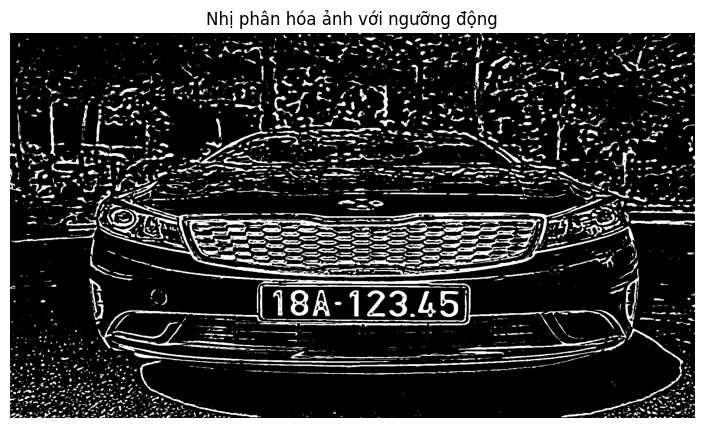

In [47]:
# nhị phân hóa ảnh bằng adaptiveThreshold
ADAPTIVE_THRESH_BLOCK_SIZE = 19
ADAPTIVE_THRESH_WEIGHT = 9
imgThresh = cv2.adaptiveThreshold(denoised, 255.0, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, ADAPTIVE_THRESH_BLOCK_SIZE, ADAPTIVE_THRESH_WEIGHT)
plt.figure(figsize=(10, 5))
plt.imshow(imgThresh, cmap='gray')
plt.title("Nhị phân hóa ảnh với ngưỡng động")
plt.axis('off')
plt.show()


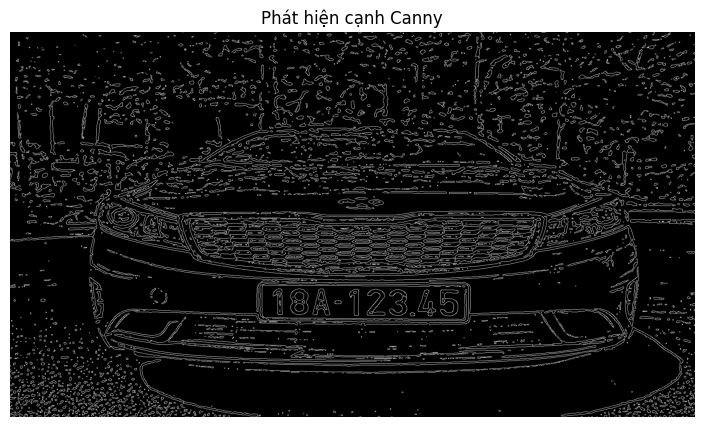

In [48]:
# phát hiện cạnh bằng thuật toán canny
canny_image = cv2.Canny(imgThresh, 250, 255)
plt.figure(figsize=(10, 5))
plt.imshow(canny_image, cmap='gray')
plt.title("Phát hiện cạnh Canny")
plt.axis('off')
plt.show()

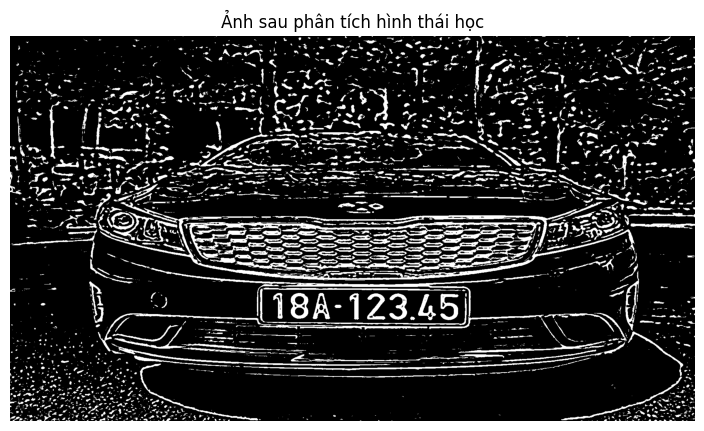

In [49]:
# phân tích hình thái học, co giãn ảnh bằng phép toán dilaton
kernel = np.ones((3, 3), np.uint8)  # Tạo kernel cho phép dãn (Tạo ra một kernel có kích thước 3x3 với tất cả các giá trị là 1. Kernel này được sử dụng để xác định cách phép dãn sẽ được áp dụng cho ảnh.)
dilated_image = cv2.dilate(imgThresh, kernel, iterations=1) 
# Dãn ảnh (Áp dụng phép dãn cho ảnh canny_image bằng cách sử dụng kernel được chỉ định. Tham số iterations=1 xác định số lần lặp của quá trình dãn, trong trường hợp này là một lần.)
# cv2.imshow("dilated_image",dilated_image)
plt.figure(figsize=(10, 5))
plt.imshow(imgThresh, cmap='gray')
plt.title("Ảnh sau phân tích hình thái học")
plt.axis('off')
plt.show()

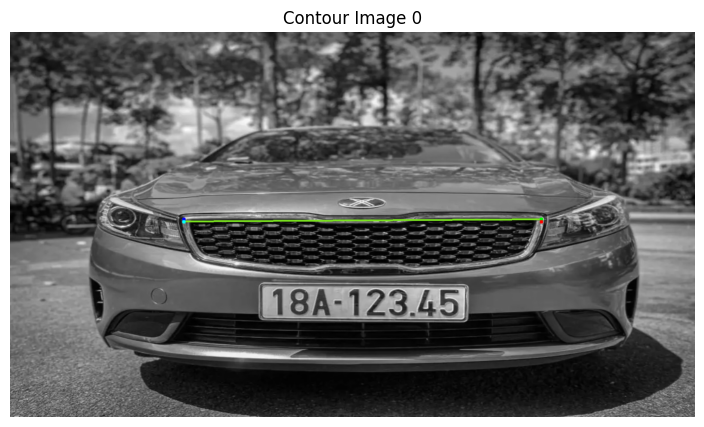

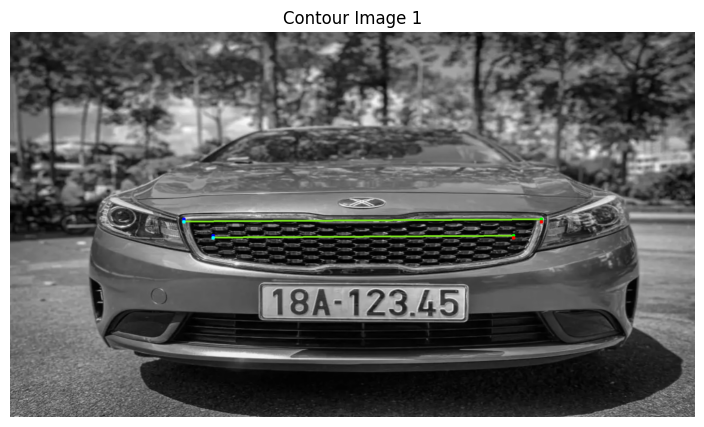

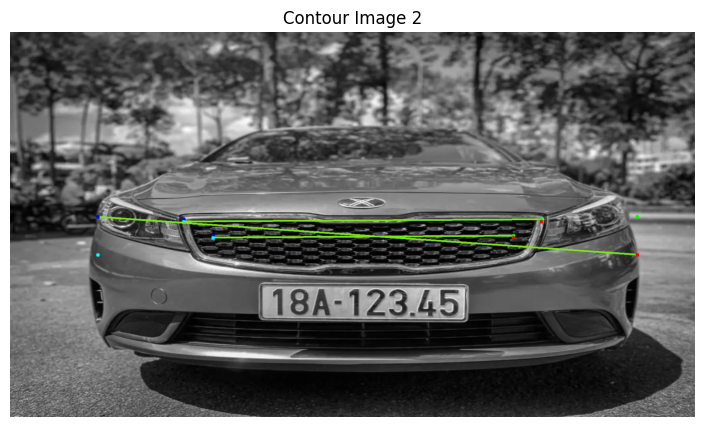

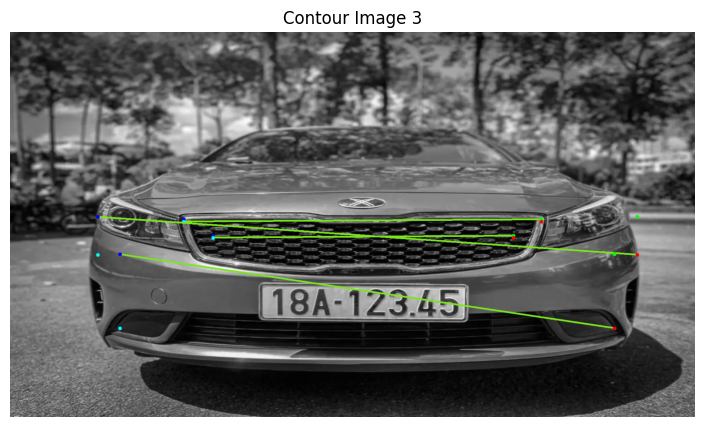

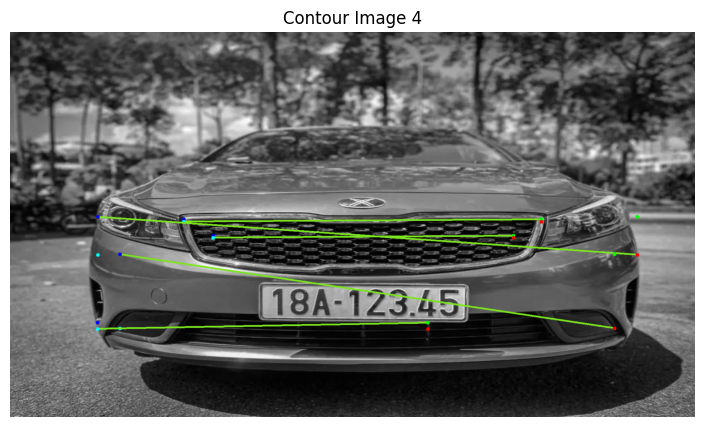

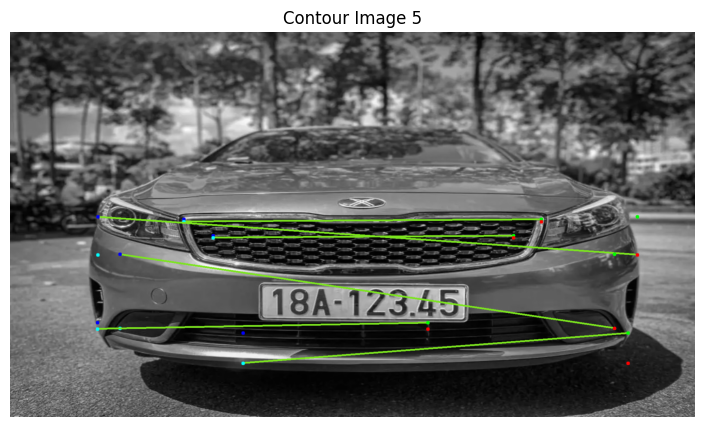

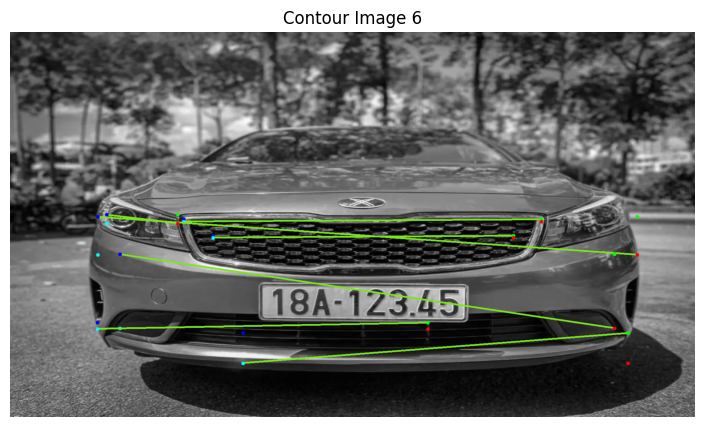

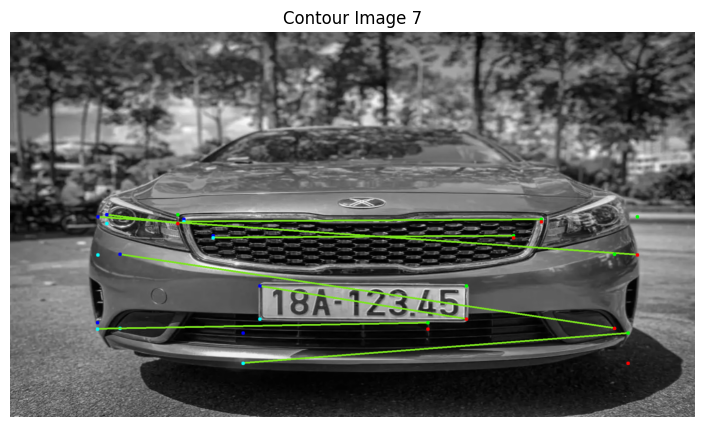

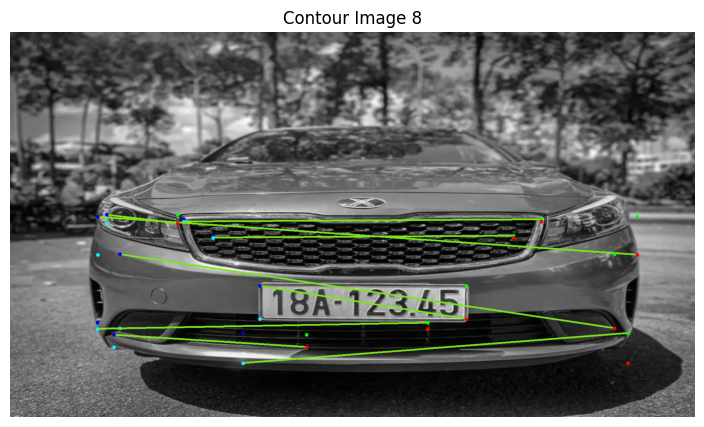

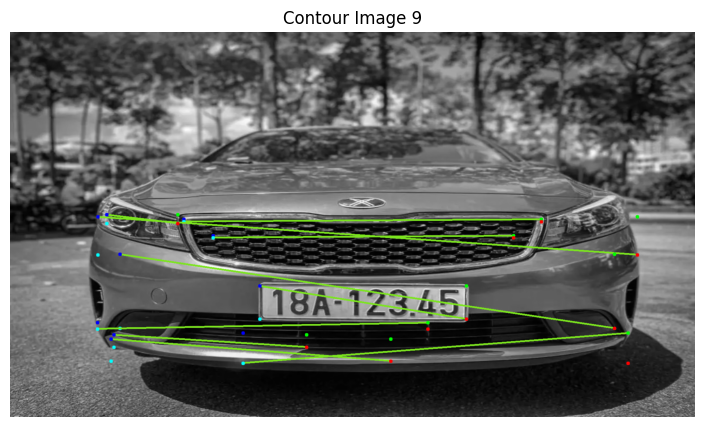

In [50]:
# phát hiện và phân tích contour (phát hiện viền)
contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # Tìm các đường viền trong ảnh
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]  # Sắp xếp và lấy 10 đường viền có diện tích lớn nhất
screenCnt = []  # Danh sách các đường viền của biển số xe

# Chuyển ảnh xám sang ảnh màu
imgColor = cv2.cvtColor(imgGray, cv2.COLOR_GRAY2BGR)

for i, c in enumerate(contours):    
    peri = cv2.arcLength(c, True)  # Tính chu vi của đường viền
    approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Làm xấp xỉ đa giác, chỉ giữ đường viền có 4 cạnh
    x, y, w, h = cv2.boundingRect(approx.copy()) # hàm này trả về một tuple 4 giá trị x, y là tọa độ góc trên cùng bên trái của hình W và h là chiều rộng của hình chữ nhật.  
    cv2.drawContours(imgColor, [approx], -1, (31,229,124), 3)  # vẽ một đường chéo để khoang vùng biển số 

    # Vẽ 4 góc của hình chữ nhật
    cv2.circle(imgColor, (x, y), 5, (255, 0, 0), -1)  # Góc trên cùng bên trái
    cv2.circle(imgColor, (x + w, y), 5, (0, 255, 0), -1)  # Góc trên cùng bên phải
    cv2.circle(imgColor, (x + w, y + h), 5, (0, 0, 255), -1)  # Góc dưới cùng bên phải
    cv2.circle(imgColor, (x, y + h), 5, (255, 255, 0), -1)  # Góc dưới cùng bên trái

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(imgColor, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị bằng matplotlib
    plt.title("Contour Image {}".format(i))
    plt.axis('off')
    plt.show()


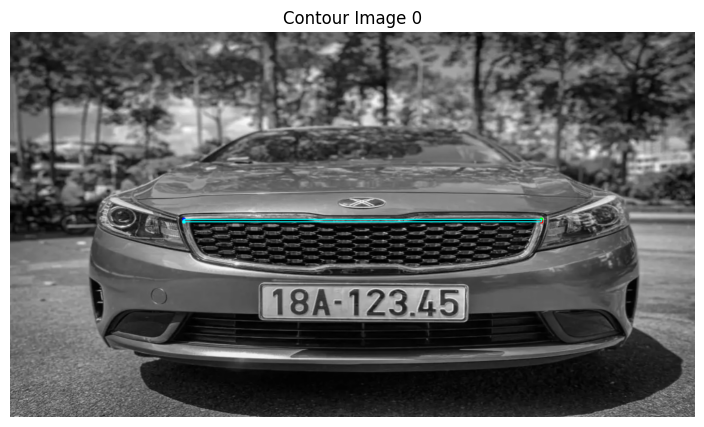

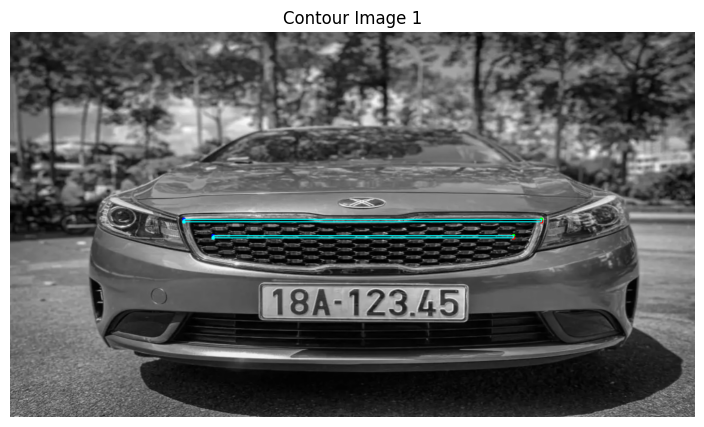

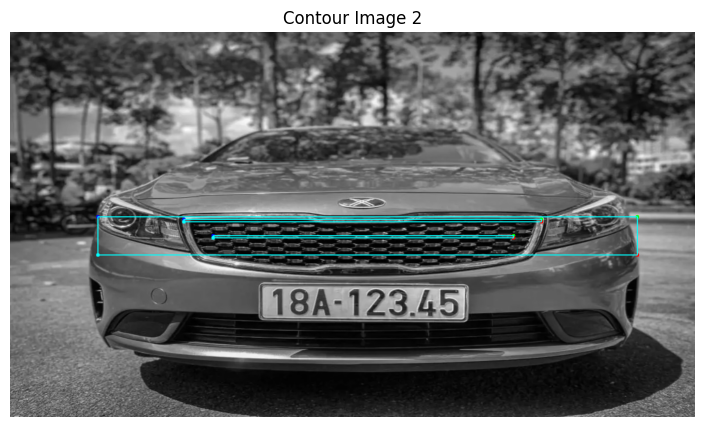

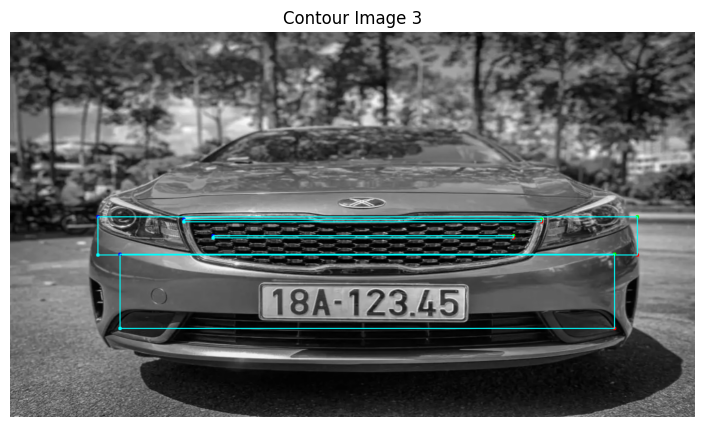

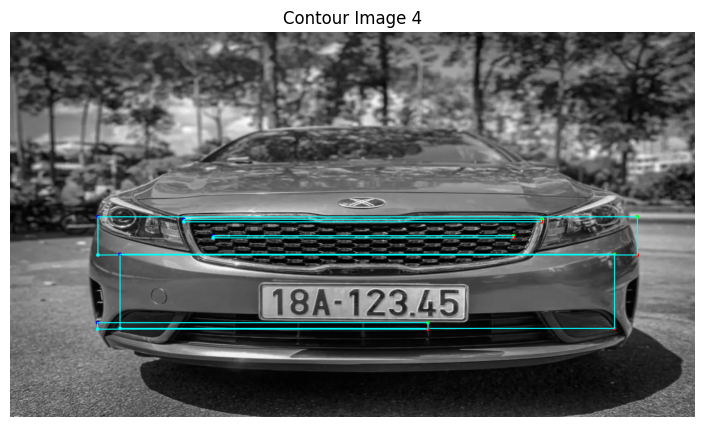

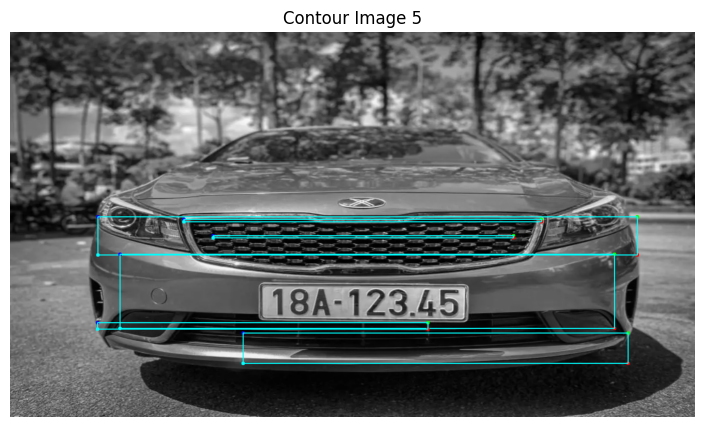

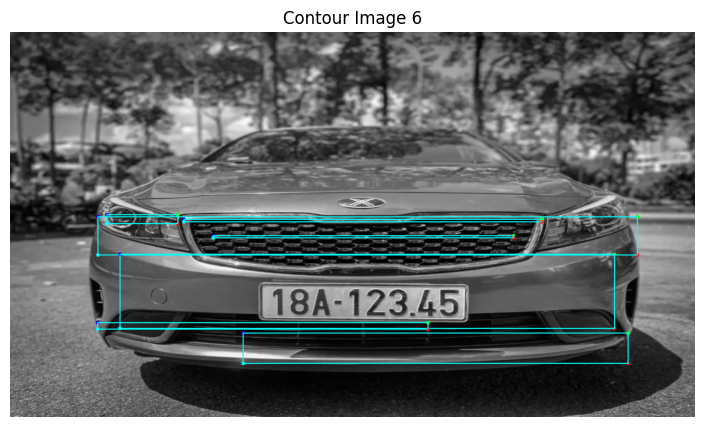

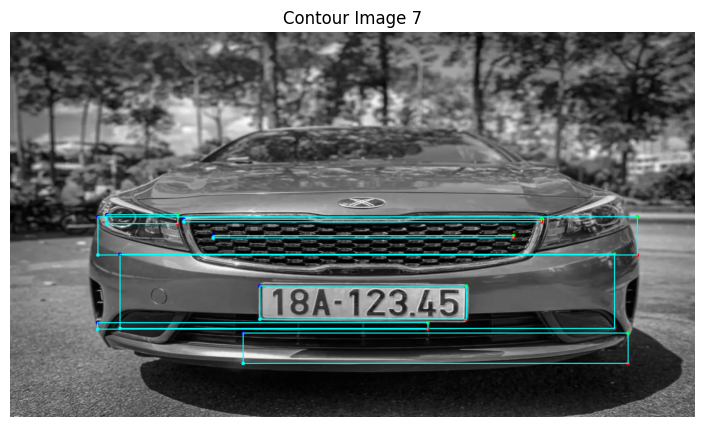

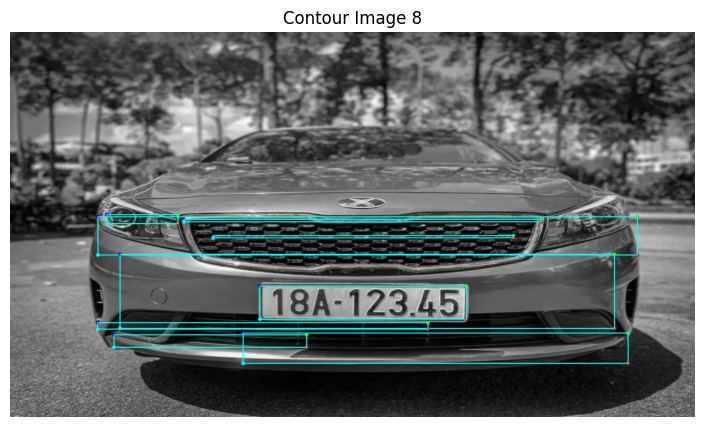

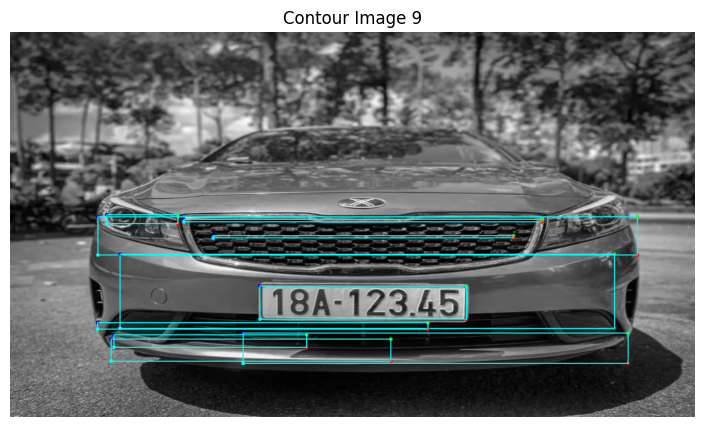

In [51]:
# Chuyển ảnh xám sang ảnh màu
imgColor = cv2.cvtColor(imgGray, cv2.COLOR_GRAY2BGR)

for i, c in enumerate(contours):    
    peri = cv2.arcLength(c, True)  # Tính chu vi của đường viền
    approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Làm xấp xỉ đa giác, chỉ giữ đường viền có 4 cạnh
    x, y, w, h = cv2.boundingRect(approx.copy()) # hàm này trả về một tuple 4 giá trị x, y là tọa độ góc trên cùng bên trái của hình W và h là chiều rộng của hình chữ nhật.  
    # Vẽ 4 góc của hình chữ nhật
    cv2.circle(imgColor, (x, y), 5, (255, 0, 0), -1)  # Góc trên cùng bên trái
    cv2.circle(imgColor, (x + w, y), 5, (0, 255, 0), -1)  # Góc trên cùng bên phải
    cv2.circle(imgColor, (x + w, y + h), 5, (0, 0, 255), -1)  # Góc dưới cùng bên phải
    cv2.circle(imgColor, (x, y + h), 5, (255, 255, 0), -1)  # Góc dưới cùng bên trái

    # Vẽ các cạnh của hình chữ nhật
    cv2.line(imgColor, (x, y), (x + w, y), (255, 255, 0), 2)  # Cạnh trên
    cv2.line(imgColor, (x + w, y), (x + w, y + h), (255, 255, 0), 2)  # Cạnh phải
    cv2.line(imgColor, (x + w, y + h), (x, y + h), (255, 255, 0), 2)  # Cạnh dưới
    cv2.line(imgColor, (x, y + h), (x, y), (255, 255, 0), 2)  # Cạnh trái

    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(imgColor, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị bằng matplotlib
    plt.title("Contour Image {}".format(i))
    plt.axis('off')
    plt.show()

    

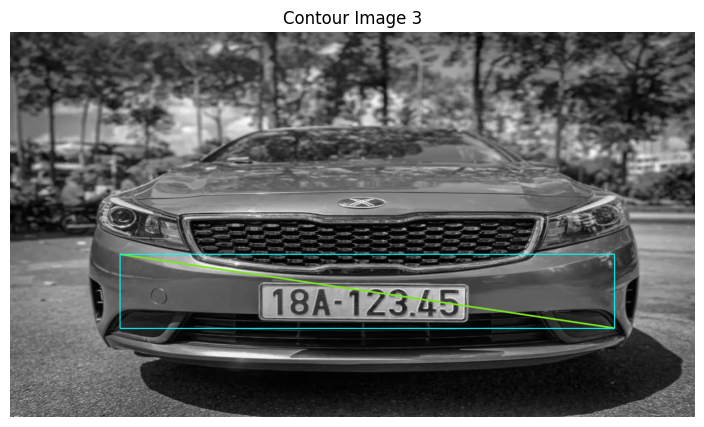

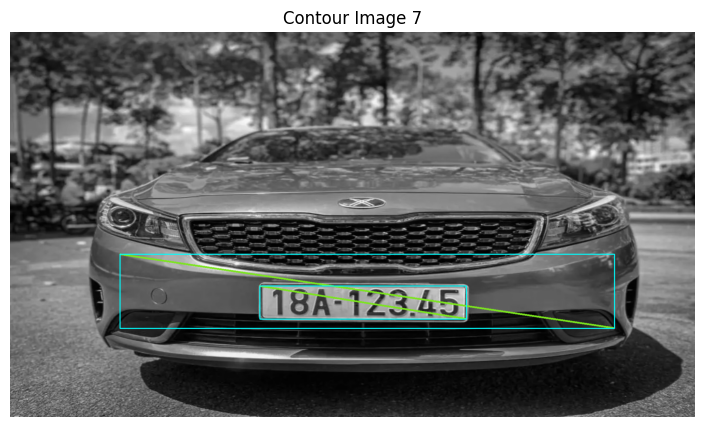

In [52]:
# Chuyển ảnh xám sang ảnh màu
imgColor = cv2.cvtColor(imgGray, cv2.COLOR_GRAY2BGR)

for i, c in enumerate(contours):    
    peri = cv2.arcLength(c, True)  # Tính chu vi của đường viền
    approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Làm xấp xỉ đa giác, chỉ giữ đường viền có 4 cạnh
    x, y, w, h = cv2.boundingRect(approx.copy()) # hàm này trả về một tuple 4 giá trị x, y là tọa độ góc trên cùng bên trái của hình W và h là chiều rộng của hình chữ nhật.  
    
    # Kiểm tra xem chiều dài có lớn hơn 10 lần chiều rộng không
    if max(w, h) <= 7 * min(w, h):
        cv2.drawContours(imgColor, [approx], -1, (31,229,124), 3)  # Khoanh vùng biển số xe

            # Vẽ các cạnh của hình chữ nhật
        cv2.line(imgColor, (x, y), (x + w, y), (255, 255, 0), 2)  # Cạnh trên
        cv2.line(imgColor, (x + w, y), (x + w, y + h), (255, 255, 0), 2)  # Cạnh phải
        cv2.line(imgColor, (x + w, y + h), (x, y + h), (255, 255, 0), 2)  # Cạnh dưới
        cv2.line(imgColor, (x, y + h), (x, y), (255, 255, 0), 2)  # Cạnh trái

        plt.figure(figsize=(10, 5))
        plt.imshow(cv2.cvtColor(imgColor, cv2.COLOR_BGR2RGB))  # Chuyển từ BGR sang RGB để hiển thị bằng matplotlib
        plt.title("Contour Image {}".format(i))
        plt.axis('off')
        plt.show()
